In [3]:
import numpy as np
import scipy
import math
from scipy import integrate 
import matplotlib.pyplot as plt
from __future__ import division
from scipy import optimize

We compute the motion of a projectile subject to a drag force. We write a routine that, given an initial position and an initial velocity in terms of a speed v and an angle θ from the horizontal, predicts the trajectory from launch all the way until it hits the ground.

In [4]:
#Drag Force
alpha = 0.01

#Projection of angles 
def split(v,ang):
    return(np.cos(ang)*v,np.sin(ang)*v)

#Change Vector 
def change(t,z):
    dx = z[2]
    dy = z[3]
    dVx = -alpha * ((z[2]*z[2]) + (z[3]*z[3]))*z[2]
    dVy = -(9.81) - (alpha * ((z[2]*z[2])+(z[3]*z[3]))*z[3])
    return np.array([dx,dy,dVx,dVy])

#Launch Trajectory
def traject(v, ang):
    Vx, Vy = split(v,ang)
    init = np.array([0,0,Vx, Vy])
    return scipy.integrate.solve_ivp(change,(0,100),init,method='RK45',t_eval=np.arange(0,2,0.01))

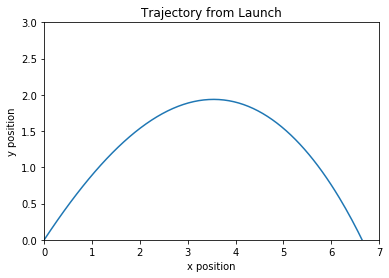

In [5]:
v_initial = 10
angle = np.pi/4
Test = traject(v_initial,angle)
plt.plot(Test.y[0],Test.y[1])
plt.xlim(0,7)
plt.ylim(0,3)
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Trajectory from Launch')
plt.show()

We use Brent’s optimization method from the scipy implementation to construct a routine to find the angle θ that maximizes the distance traveled.

In [6]:
v_initial = 10

def TestFunctionMax(ang):
    ang = math.radians(ang)
    Vx, Vy = split(v_initial,ang)
    init = [0,0,Vx, Vy]
    xvals = scipy.integrate.solve_ivp(change,(0,100),init,method='RK45',t_eval=np.arange(0,2,0.01)).y[0]
    yvals = scipy.integrate.solve_ivp(change,(0,100),init,method='RK45',t_eval=np.arange(0,2,0.01)).y[1]
    
    for i in range(len(yvals)):
        y = yvals[i]
        if y<0:
            return -1*xvals[i-1]
        
def Distance(ang):
    ang = math.radians(ang)
    Vx, Vy = split(v,ang)
    init = [0,0,Vx, Vy]
    xvals = scipy.integrate.solve_ivp(change,(0,100),init,method='RK45',t_eval=np.arange(0,2,0.01)).y[0]
    yvals = scipy.integrate.solve_ivp(change,(0,100),init,method='RK45',t_eval=np.arange(0,2,0.01)).y[1]
    
    for i in range(len(yvals)):
        y = yvals[i]
        if y<0:
            return 1*xvals[i-1]

In [7]:
Optimized_angle =  optimize.brent(TestFunctionMax,brack=(0,math.pi/2))
print Optimized_angle

44.02735345418964


This makes sense. Using Brent’s optimization method we find the optimal angle is about 44 degrees.`

We pick some reasonable values for initial v and α and plot the trajectory for various values of θ over a range that includes the distance-maximizing θ.

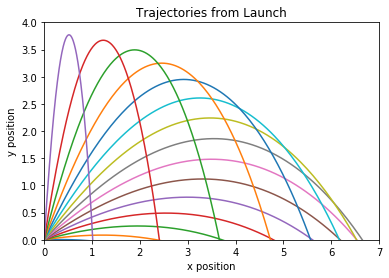

In [8]:
alpha = 0.01
v_initial=10 

# Optimized angle is 0.767945 which is ~np.pi/4.5 and in our array
ang = np.arange(np.pi/100,np.pi/2,np.pi/30)
x_intersect = np.zeros(len(ang))

for i in range(0, len(ang)):
    a = traject(v_initial, ang[i])
    plt.plot(a.y[0], a.y[1])
    index = np.argwhere(a.y[1] < 0)
    val = index[0][0]-1
    value = val-1
    x_intersect[i] = a.y[0][value]
    
plt.ylim(0, 4)
plt.xlim(0,7)
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Trajectories from Launch')
plt.show()